In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

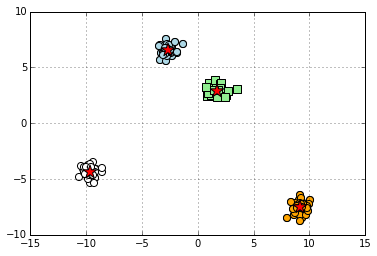

In [35]:
from sklearn.datasets import make_blobs

X,_= make_blobs(
    n_samples=150, 
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True)

import matplotlib.pyplot as plot
%matplotlib inline

plot.scatter(
    X[:,0],
    X[:,1],
    c="white",
    marker="o",
    s=50)

plot.grid()

from sklearn.cluster import KMeans

km = KMeans(
    init="random",
    n_clusters=4,
    n_init=10, 
    max_iter=300, 
    tol=1e-04,
    random_state=0)

y_km = km.fit_predict(X)

plot.scatter(
    X[y_km == 0,0],
    X[y_km == 0,1],
    c="lightgreen",
    marker="s",
    s=50)

plot.scatter(
    X[y_km == 1,0],
    X[y_km == 1,1],
    c="orange",
    marker="o",
    s=50)

plot.scatter(
    X[y_km == 2,0],
    X[y_km == 2,1],
    c="lightblue",
    marker="o",
    s=50)

r = plot.scatter(
    km.cluster_centers_[:,0], 
    km.cluster_centers_[:,1], 
    c="red",
    marker="*",
    s=200)

In [36]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(nu=0.01)
clf.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.01, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

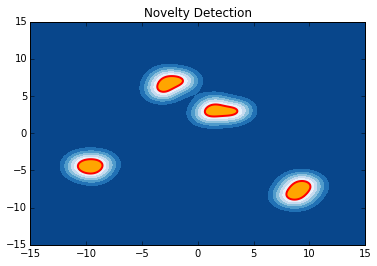

In [38]:
xx, yy = np.meshgrid(np.linspace(-15, 15, 500), np.linspace(-15, 15, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")

plt.contourf(
    xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)

a = plt.contour(
    xx, yy, Z, levels=[0], linewidths=2, colors='red')

z = plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')